In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn import neighbors
from sklearn import linear_model
from sklearn import ensemble
from sklearn import svm
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv("/content/Pumpkin_Seeds_Dataset.csv")
X , y = data.iloc[:,:-1], data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
l0 = ["DecisionTreeClassifier","KNeighborsClassifier","LogisticRegression","RandomForestClassifier","SVC"]
l = []
#DecisionTreeClassifier
clf_tree = tree.DecisionTreeClassifier()
clf_tree.fit(X_train,y_train)
y_pred_tree = clf_tree.predict(X_test)
l.append(accuracy_score(y_test,y_pred_tree))
#KNeighborsClassifier
clf_KNN = neighbors.KNeighborsClassifier()
clf_KNN.fit(X_train,y_train)
y_pred_KNN = clf_KNN.predict(X_test)
l.append(accuracy_score(y_test,y_pred_KNN))
#LogisticRegression
clf_logRg = linear_model.LogisticRegression()
clf_logRg.fit(X_train,y_train)
y_pred_logRg = clf_logRg.predict(X_test)
l.append(accuracy_score(y_test,y_pred_logRg))
#RandomForestClassifier
clf_randFort = ensemble.RandomForestClassifier()
clf_randFort.fit(X_train,y_train)
y_pred_randFort = clf_randFort.predict(X_test)
l.append(accuracy_score(y_test,y_pred_randFort))
#SVC
clf_svc = svm.LinearSVC(max_iter=100000)
clf_svc.fit(X_train,y_train)
y_pred_svc = clf_svc.predict(X_test)
l.append(accuracy_score(y_test,y_pred_svc))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Text(0, 0.5, 'Accuracy')

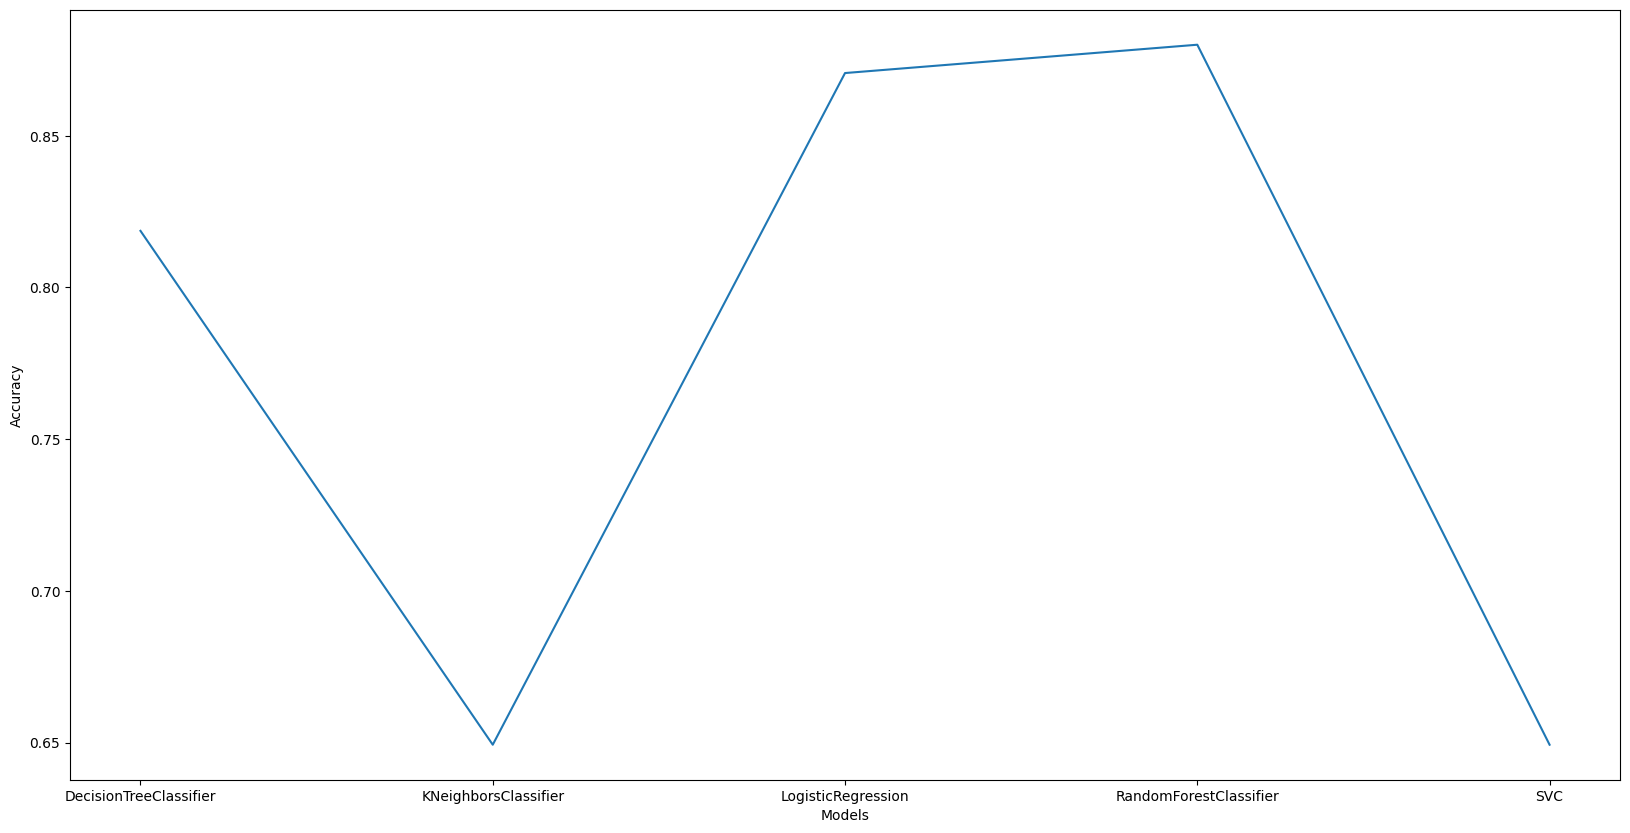

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(l0,l)
plt.xlabel("Models")
plt.ylabel("Accuracy")

In [ ]:
pd.DataFrame(metrics.classification_report(y_test,y_pred_svc,output_dict=True))

,Çerçevelik,Ürgüp Sivrisi,accuracy,macro avg,weighted avg
precision,0.957143,0.578689,0.649333,0.767916,0.775989
recall,0.342711,0.983287,0.649333,0.662999,0.649333
f1-score,0.504708,0.728586,0.649333,0.616647,0.611871
support,391.000000,359.000000,0.649333,750.000000,750.000000


In [ ]:
pd.DataFrame(metrics.classification_report(y_test,y_pred_randFort,output_dict=True))

,Çerçevelik,Ürgüp Sivrisi,accuracy,macro avg,weighted avg
precision,0.875312,0.885387,0.88,0.880349,0.880134
recall,0.897698,0.860724,0.88,0.879211,0.880000
f1-score,0.886364,0.872881,0.88,0.879622,0.879910
support,391.000000,359.000000,0.88,750.000000,750.000000


In [ ]:
pd.DataFrame(metrics.classification_report(y_test,y_pred_logRg,output_dict=True))

,Çerçevelik,Ürgüp Sivrisi,accuracy,macro avg,weighted avg
precision,0.863861,0.878613,0.870667,0.871237,0.870922
recall,0.892583,0.846797,0.870667,0.869690,0.870667
f1-score,0.877987,0.862411,0.870667,0.870199,0.870532
support,391.000000,359.000000,0.870667,750.000000,750.000000


In [ ]:
pd.DataFrame(metrics.classification_report(y_test,y_pred_KNN,output_dict=True))

,Çerçevelik,Ürgüp Sivrisi,accuracy,macro avg,weighted avg
precision,0.648148,0.650943,0.649333,0.649546,0.649486
recall,0.716113,0.576602,0.649333,0.646357,0.649333
f1-score,0.680437,0.611521,0.649333,0.645979,0.647450
support,391.000000,359.000000,0.649333,750.000000,750.000000


In [ ]:
pd.DataFrame(metrics.classification_report(y_test,y_pred_tree,output_dict=True))

,Çerçevelik,Ürgüp Sivrisi,accuracy,macro avg,weighted avg
precision,0.831169,0.805479,0.818667,0.818324,0.818872
recall,0.818414,0.818942,0.818667,0.818678,0.818667
f1-score,0.824742,0.812155,0.818667,0.818448,0.818717
support,391.000000,359.000000,0.818667,750.000000,750.000000


In [ ]:
print(l)

[0.8186666666666667, 0.6493333333333333, 0.8706666666666667, 0.88, 0.6493333333333333]


In [ ]:
search = GridSearchCV(clf_KNN,{'n_neighbors':[5,6,7,8,9,10]})
s = search.fit(X_train,y_train)
s.best_estimator_.fit(X_train,y_train)
y_pred_KNN = s.best_estimator_.predict(X_test)
print(accuracy_score(y_test,y_pred_KNN),s.best_params_)

0.6493333333333333 {'n_neighbors': 5}


In [ ]:
search = GridSearchCV(clf_tree,{'max_depth':[1,2,3,4,5,6,7,8,9,10]})
s = search.fit(X_train,y_train)
s.best_estimator_.fit(X_train,y_train)
y_pred_tree = s.best_estimator_.predict(X_test)
print(accuracy_score(y_test,y_pred_tree),s.best_params_)

0.8666666666666667 {'max_depth': 3}


In [ ]:
search = GridSearchCV(clf_logRg,{'C':[0.1,1,2,3,45,6,7,8,9,10]})
s = search.fit(X_train,y_train)
s.best_estimator_.fit(X_train,y_train)
y_pred_log = s.best_estimator_.predict(X_test)
print(accuracy_score(y_test,y_pred_log),s.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.876 {'C': 2}


In [ ]:
search = GridSearchCV(clf_randFort,{'max_samples':[50,60,70,80,90,100,140,160,200]})
s = search.fit(X_train,y_train)
s.best_estimator_.fit(X_train,y_train)
y_pred_randFort = s.best_estimator_.predict(X_test)
print(accuracy_score(y_test,y_pred_randFort),s.best_params_)

0.8826666666666667 {'max_samples': 140}


In [ ]:
search = GridSearchCV(clf_svc,{'C':[0.1,1,2,3,45,6,7,8,9,10]})
s = search.fit(X_train,y_train)
s.best_estimator_.fit(X_train,y_train)
y_pred_svm = s.best_estimator_.predict(X_test)
print(accuracy_score(y_test,y_pred_svm),s.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

0.8413333333333334 {'C': 6}


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
